                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Valid   No. Observations:                   63
Model:                            GLM   Df Residuals:                       61
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.220
Date:                Fri, 01 Aug 2025   Deviance:                       62.441
Time:                        17:26:33   Pearson chi2:                     63.8
No. Iterations:                     6   Pseudo R-squ. (CS):             0.1857
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9062      0.632     -1.435      0.1

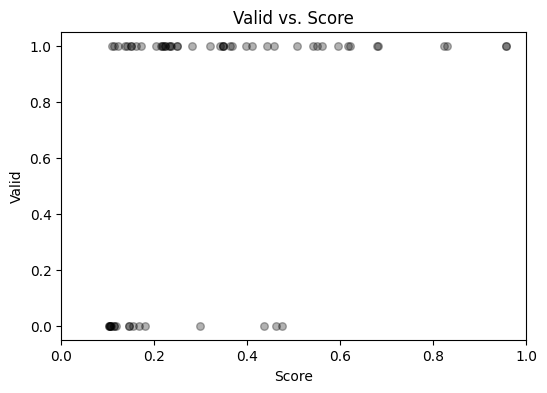

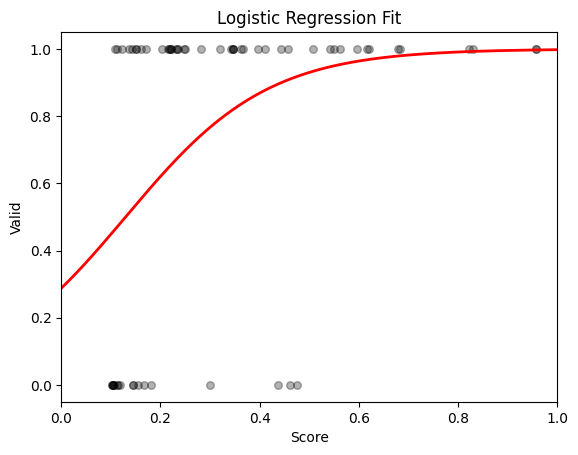

Score threshold for p = 0.9 is 0.4440878183468617


In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1. import selection table
selection_table = '/Path/to/.txt'

# Load the selection table into a DataFrame
table = pd.read_csv(selection_table, sep='\t')

# 2. Extract the numeric score from the first 4 characters of 'Begin File'
table['Score'] = table['Begin File'].str[:5].astype(float)

# 3. fit the logistic regression model
model = smf.glm(formula='Valid ~ Score', data=table, family=sm.families.Binomial()).fit()
print(model.summary())

# 4. plot the individual points (x = Score, y = Valid):
plt.figure(figsize=(6, 4))

# Scatter plot with transparency (alpha=0.3)
plt.scatter(table['Score'], table['Valid'], color='black', alpha=0.3, s=30)

# Set x-axis limits
plt.xlim(0, 1)

# Add labels (optional)
plt.xlabel('Score')
plt.ylabel('Valid')

plt.title('Valid vs. Score')
plt.grid(False)
plt.show()

# 4. add the modeled regression relationship (a curve):

# Create a range of Score values from 0 to 1
x_vals = np.linspace(0, 1, 300)

# Create a DataFrame for prediction
x_df = pd.DataFrame({'Score': x_vals})

# Predict probabilities
y_pred = model.predict(x_df)

# Plot the data points
plt.scatter(table['Score'], table['Valid'], color='black', alpha=0.3, s=30)

# Add the logistic regression curve
plt.plot(x_vals, y_pred, color='red', linewidth=2)

# Formatting
plt.xlim(0, 1)
plt.xlabel('Score')
plt.ylabel('Valid')
plt.title('Logistic Regression Fit')
plt.grid(False)
plt.show()

# 5. compute score threshold for probability p of correct prediction:

p = 0.9  # desired probability

# Get the model coefficients
intercept = model.params['Intercept']
slope = model.params['Score']

# Compute the score threshold
score_threshold = (np.log(p / (1 - p)) - intercept) / slope

print("Score threshold for p =", p, "is", score_threshold)


Score threshold for p = 0.9 is 0.6736068581736789
